<h1>Recomendación para establecer punto de venta de café</h1>

<h2>Tabla de Contenido</h2>
<ul>
    <li>Introducción</li>
    <li>Data</li>
    <li>Metodología</li>
    <li>Análisis</li>
    <li>Resultados</li>
    <li>Discución</li>
    <li>Conclusión</li>
   </ul>

<h2>Definición del Problema Comercial</h2>

Unos inversionistas desean comenzar una cadena de kioskos de café moviles con wifi a su alrededor para sus clientes en la ciudad de Brooklyn, New York. En la ciudad de New York actualmente existen multiples cadenas y lugares de venta de café por toda la ciudad. También es una de las ciudades mas caras del mundo por lo cual establecer un negocio que incluya renta de un local y costos de utilidades como luz, agua o internet podria ser un reto para comenzar el mismo. Para ello desean identificar lugares con Wifi gratis en la ciudad, como tambien identificar cuales áreas están cercanas a univerdidades , tiendas y oficinas para determinar área con mayor potencial de ventas y localidades con escases de cafes. Al final nuestra recomendación estará basada en los datos que nos provea el API de Foursquare que contiene la mayor cantidad de data sobre localidades.

<h2>Descripción de los Datos</h2>

<ul>
    <li>
Se usara data con las coordenadas de los puntos con wifi alrededor de New York <a href="https://data.cityofnewyork.us/City-Government/NYC-Wi-Fi-Hotspot-Locations-Map/7agf-bcsq">NYC Data</a>. En esta data nos provee todas las localidades, barrios y coordenadas que tienen wifi gratis alrededor de la ciudad de New York.
    </li>
    <li>
        Se usara <b><a href="https://es.foursquare.com/developers/login?continue=%2Fdevelopers%2Fprojects">foursquare</a></b> para identificar las universidades, mall y oficinas en el barrio de Brooklyn. En especifico usaremos del API el servicio de "Find Nearby Places" que nos devolvera la cantidad de venues filtrado por categorias, distancia de las coordenadas que le enviaremos.
    </li>
<ul>

<h2>Metodología</h2>
<p>En este proyecto nos estaremos enfocando en manipular data de las localidades con wifi alrededor de la ciudad de New York. Seleccionaremos solo las localidades del sector de Brooklyn, NY ya que es donde nos interesa comenzar el negocio. Caragaremos los datos ya filtrados de excel a un dataframe en Panda, para luego contabilizar cuales barrios tienen mayor cantidad de localidades con wifi y vusualizar el resultado en gráfico de barras. De aqui segmentaremos nuestro dataframe para solo quedarnos con los barrios con mayor cantidad.</p>

<p> Una vez identidicado en nuestro dataframe las localidades con wifi gratis que estaremos evaluando, usaremos el API de Foursquare para enviarle cada una de las coordenadas de esas localidades y calcular la cantidad de venues con las categorias que nos interasa (Tiendas ,universidades y oficinas). Del resultado obtenido del API normalizaremos el json y crearemos un dataframe nuevo donde insertaremos la localización,barrio, coordenadas y la cantidad de venues calculada con los resultados enviados de Foursquare. Luego procederemos a identificar solo los que contenga 50 venues que es la cantidad máxima que devuelve Foursquare en el radio enviado como parámetro en este caso 500 y actualizamos nuestro dataframe</p>

<p> Finalmente repetiremos el proceso pero esta vez buscaremos en Foursquare los venues de café alrededor de cada una de nuestras localidades y solo escojeremos las diez con menos venues devueltos por el Foursquare.</p>
<p>Nuestra recomendación estara basada en cuales barrios con mayor cantidad de universidades,tiendas u oficinas alrededor y que a la misma vez contenga menos cantidad de negocios de café alrededor en Brooklyn, NY. Usaremos tablas de nuestro dataframe, gráfico de barras y mapas para mostrar los puntos con wifi con posible utilización para establecer un kioso de negocio o de venta de café.

<h2>Análisis</h2>
Realizaremos los siguientes procedimientos para nuestro análisis:

<h1>Librerias para Python</h1>

In [28]:
import numpy as np  # datos vectorizados
import pandas as pd # dataframes 


In [2]:
import matplotlib.pyplot as plt #para graficar
%matplotlib inline 

In [3]:
#manejar archivos JSON 
import json 
!conda install -c conda-forge geopy --yes

Retrieving notices: ...working... done
Solving environment: ...working... done

# All requested packages already installed.



In [4]:
from geopy.geocoders import Nominatim # convertir valores de latitud y longitud

In [5]:
import requests #manejar solicitudes
from pandas.io.json import json_normalize #convertir un archivo json en un dataframe pandas

# Matplotlib y módulos asociados para graficar
import matplotlib.cm as cm
import matplotlib.colors as colors

# importar k-means desde la fase de agrupación
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

In [6]:
!conda install -c conda-forge folium=0.5.0 --yes

Solving environment: ...working... done

# All requested packages already installed.



In [7]:
import folium #graficar mapas 

<h1>Exploración de los puntos con wifi en la ciudad de New York<h1>

Se procedio a trabajar la data descargada en excel del site NYC Data donde contiene los puntos con wifi alrededor de la ciudad de New York, pero antes se le aplico un filtros para solo los puntos en el vecindario de Brooklyn. 

In [8]:
location = pd.read_csv("NYC_Wi-Fi_Hotspot_Locations_Map_Filter.csv")
location=location.query("Borough_Name=='Brooklyn'")
location.head()


OBJECTID  Type              Provider                       Location  \
2      12370  Free      Transit Wireless                   Grand St (L)   
3       9893  Free     Downtown Brooklyn                  125 Court St.   
7      11018  Free                   BPL          380 WASHINGTON AVENUE   
9      12607  Free      Transit Wireless  Broadway Junction (A,C,J,L,Z)   
13     12084  Free  LinkNYC - Citybridge               181 Court Street   

     Latitude  Longitude             X            Y      Location_T      City  \
2   40.711926 -73.940670  1.000698e+06  198655.9088  Subway Station  Brooklyn   
3   40.689985 -73.991995  9.864700e+05  190656.6804         Outdoor  Brooklyn   
7   40.687379 -73.966031  9.936708e+05  189708.9979         Library  Brooklyn   
9   40.678334 -73.905316  1.010513e+06  186425.9753  Subway Station  Brooklyn   
13  40.687901 -73.993147  9.861506e+05  189897.3184   Outdoor Kiosk  Brooklyn   

   Borough_Name Neighborhood_Tabulation_Area_Code  \
2      Brooklyn                              BK90   
3      Brooklyn                              BK09   
7      Brooklyn                              BK69   
9      Brooklyn                              BK79   
13     Brooklyn                              BK38   

                        Neighborhood_Tabulation_Area  \
2                                  East Williamsburg   
3                       Brooklyn Heights-Cobble Hill   
7                                       Clinton Hill   
9                                         Ocean Hill   
13  DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill   

                    Location_points  
2   (40.7119259997, -73.9406699994)  
3   (40.6899850001, -73.9919950004)  
7    (40.6873790941, -73.966030666)  
9   (40.6783340002, -73.9053160001)  
13  (40.6879008003, -73.9931469103)

<h1>Explorando los datos cargados</h1>

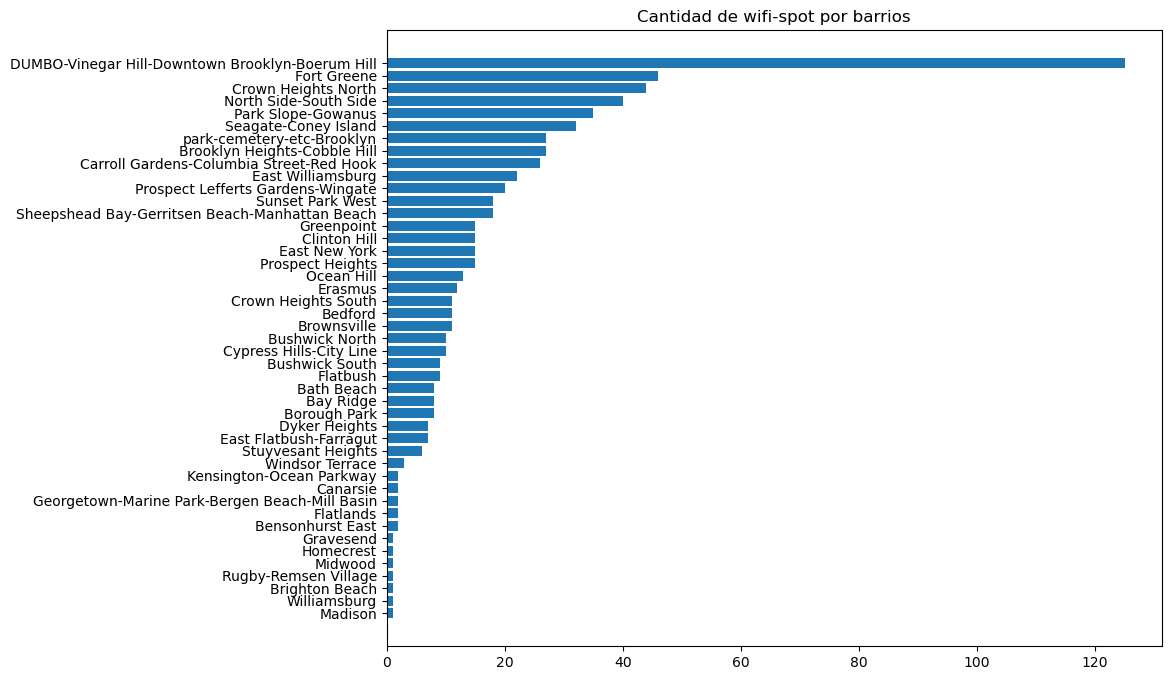

In [26]:
areas=pd.DataFrame(location.groupby(["Neighborhood_Tabulation_Area"]).size(),columns=['Neighborhood_Tabulation_Area_Code']).sort_values(by="Neighborhood_Tabulation_Area_Code")

# Initialize a Figure and an Axes
fig, ax = plt.subplots()

# Fig size
fig.set_size_inches(10,8)

# Create horizontal bars
ax.barh(y=areas.index, width=areas.Neighborhood_Tabulation_Area_Code);

# Add title
ax.set_title('Cantidad de wifi-spot por barrios');

En el estudio solo nos limitaremos a sector de Brooklyn. Seleccionaremos los primeros 5 barrios con más puntos de wifi y obtendremos las coordenadas de ellos para luego utilizarlas en foursquare. Por medio de la libreria folium se muestran las localidades seleccionadas en un mapa.

In [10]:

#Limpiar dataframe
vecindarios=location.drop(["OBJECTID","Type","Provider","X","Y","Location_T","City","Borough_Name","Location_points"],axis=1)

In [27]:
vecindarios.reset_index(drop=True,inplace=True)
vecindarios.rename(columns={"Neighborhood_Tabulation_Area_Code":"Code","Neighborhood_Tabulation_Area":"Neighborhood", "Location": "label", "Latitude": "lat" , "Longitude": "lng"},inplace=True)

#Solo utilizaremos los 5 vecindarios con más puntos de wifi
# fast method
filter_list = ['BK38', 'BK37', 'BK68', 'BK61', 'BK73']
vecindarios=vecindarios[vecindarios.Code.isin(filter_list)]
print(vecindarios)

                                     label        lat        lng  Code  \
0                         181 Court Street  40.687901 -73.993147  BK38   
1                      620 ATLANTIC AVENUE  40.683625 -73.977006  BK37   
2       254 Flatbush Ave. Extension (pole)  40.692723 -73.983025  BK38   
3                         685 Franklin Ave  40.675141 -73.956281  BK61   
4    Court St (M,R)/Borough Hall (2,3,4,5)  40.693219 -73.989998  BK38   
..                                     ...        ...        ...   ...   
285                         Utica Av (A,C)  40.679364 -73.930729  BK61   
286                Boro Hall Park 2 (Pole)  40.693069 -73.990089  BK38   
287                      710 FULTON STREET  40.685787 -73.973320  BK68   
288                     Bedford Avenue (L)  40.717304 -73.956872  BK73   
289                    402 Atlantic Avenue  40.686812 -73.984970  BK38   

                                         Neighborhood  
0    DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill  

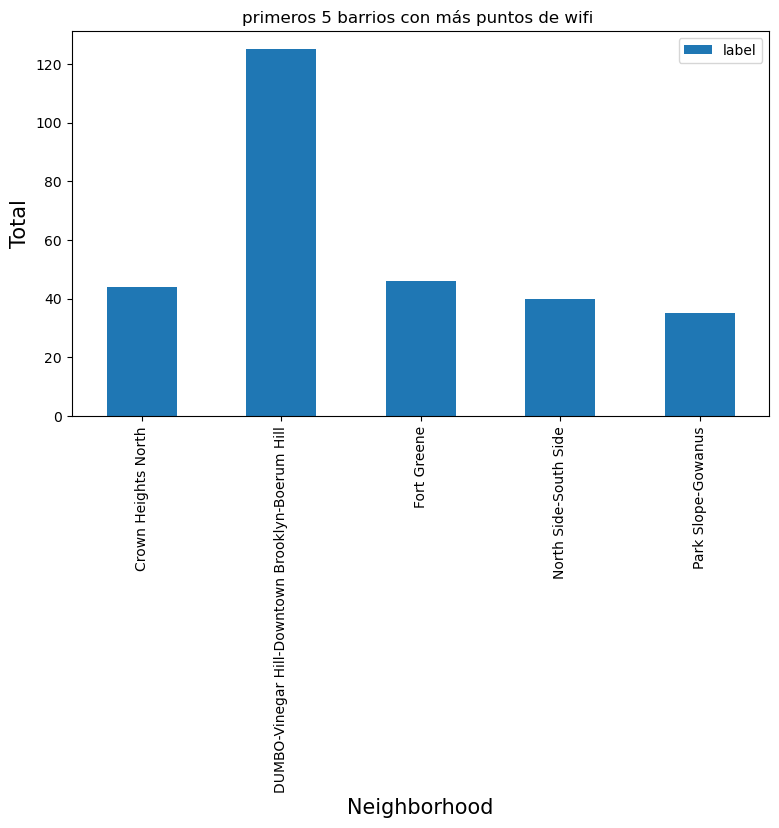

In [101]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('primeros 5 barrios con más puntos de wifi ')
#On x-axis
plt.xlabel('Location', fontsize = 15)
#On y-axis
plt.ylabel('Total', fontsize=15)
#giving a bar plot
vecindarios.groupby('Neighborhood')['label'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

In [12]:
address = 'Brooklyn'
geolocator = Nominatim(user_agent="to_explorer")
location_map = geolocator.geocode(address)
print(location_map)
latitude_map = location_map.latitude
longitude_map = location_map.longitude
print('The geograpical coordinate of Brooklyn are {}, {}.'.format(latitude_map, longitude_map))

Brooklyn, Kings County, City of New York, New York, United States
The geograpical coordinate of Brooklyn are 40.6526006, -73.9497211.


In [13]:
# crear un mapa de Brooklyn usando los valores de latitud y longitud
mapa = folium.Map(location=[latitude_map, longitude_map], zoom_start=11)


<h2>Mapa con los puntos donde existe Wifi en el vecindario de Brooklyn, NY</h2>

In [20]:

# añadir los marcadores al mapa de los puntos wifi
for lat, lng, label in zip(vecindarios['lat'], vecindarios['lng'], vecindarios['label']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=8,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(mapa)  
    
mapa

<h1>Utilizando Foursquare</h1>

Se utilizara el API de FourSquare para explorar las áreas y segmentar, por medio de una función que los explore todos.

In [41]:
CLIENT_ID = 'MYIJZ5F2KGAABO4EEFMC1L2BPO15BJF0Q5NHEQWTJKCCQPW3' # su ID de Foursquare
CLIENT_SECRET = 'AIVOTS3TWVHXV4Z1O4N0Y0VGO5GIPPWRB4MI5HP5YQM5Z345' # Secreto de Foursquare
VERSION = '20180605' # versión de la API de Foursquare
LIMIT = 100 # Un valor límite para la API de Foursquare

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: MYIJZ5F2KGAABO4EEFMC1L2BPO15BJF0Q5NHEQWTJKCCQPW3
CLIENT_SECRET:AIVOTS3TWVHXV4Z1O4N0Y0VGO5GIPPWRB4MI5HP5YQM5Z345


In [42]:
def get_category_count(lat,lng):
    import requests
    url = "https://api.foursquare.com/v3/places/search?ll={}%2C{}&radius=500&categories=17114%2C17104%2C12013%2C11124&fields=name%2Ccategories%2Clocation%2Cdistance&sort=DISTANCE&limit=50".format(
            lat,lng)

    headers = {
        "accept": "application/json",
        "Authorization": "fsq3Zg8v3F1ZNeaZ0LMdACtrdq7PIOQ5oqh2aaylyDdL1X8="
    }

    response = requests.get(url, headers=headers)
    import json
    data = response.json()
    neighborhoods_data=data['results']
    #Creando las columnas del dataframe
    columnas_nombres = ['Borough', 'Name', 'Distance', 'Category']
    neighborhoods_dataframe = pd.DataFrame(columns=columnas_nombres)
    neighborhoods_dataframe
    #iteraccion para llenar el dataframe
    for data in neighborhoods_data:
        borough = data['location']['locality']
        neighborhood_name = data['name']
        neighborhood_category = data['categories'][0]['name']
        neighborhood_distance = data['distance']
        neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
        'Name': neighborhood_name,
        'Distance': neighborhood_distance,
        'Category':neighborhood_category},ignore_index=True)
        
    return len(neighborhoods_dataframe)

In [43]:
import json
#Creando las columnas del dataframe con la cantidad de venues
columnas = ['Neighborhood', 'Location_Wifi', 'Total_Venues', 'Latitud', 'Longitude']
DF_Venues = pd.DataFrame(columns=columnas)
print(DF_Venues)

Empty DataFrame
Columns: [Neighborhood, Location_Wifi, Total_Venues, Latitud, Longitude]
Index: []


In [44]:
#recorrer tabla con las coordenadas

#nuevo Dataframe con cantidad de venues por puntos de wifi
for lat,lon,label,neighborhood in zip(vecindarios['lat'],vecindarios['lng'],vecindarios['label'],vecindarios['Neighborhood']):
    #Contiene el total de venues alrededor del wifi-spot
    function_result=get_category_count(lat,lon)
    DF_Venues=DF_Venues.append({'Neighborhood':neighborhood,'Location_Wifi':label,'Total_Venues':function_result,'Latitud':lat,'Longitude':lon},ignore_index=True)


C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3091242671.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  DF_Venues=DF_Venues.append({'Neighborhood':neighborhood,'Location_Wifi':label,'Total_Venues':function_result,'Latitud':lat,'Longitude':lon},ignore_index=True)
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: F

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3091242671.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  DF_Venues=DF_Venues.append({'Neighborhood':neighborhood,'Location_Wifi':label,'Total_Venues':function_result,'Latitud':lat,'Longitude':lon},ignore_index=True)
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: F

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3091242671.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  DF_Venues=DF_Venues.append({'Neighborhood':neighborhood,'Location_Wifi':label,'Total_Venues':function_result,'Latitud':lat,'Longitude':lon},ignore_index=True)
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: F

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3091242671.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  DF_Venues=DF_Venues.append({'Neighborhood':neighborhood,'Location_Wifi':label,'Total_Venues':function_result,'Latitud':lat,'Longitude':lon},ignore_index=True)
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: F

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3091242671.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  DF_Venues=DF_Venues.append({'Neighborhood':neighborhood,'Location_Wifi':label,'Total_Venues':function_result,'Latitud':lat,'Longitude':lon},ignore_index=True)
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: F

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3091242671.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  DF_Venues=DF_Venues.append({'Neighborhood':neighborhood,'Location_Wifi':label,'Total_Venues':function_result,'Latitud':lat,'Longitude':lon},ignore_index=True)
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: F

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3091242671.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pand

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3091242671.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  DF_Venues=DF_Venues.append({'Neighborhood':neighborhood,'Location_Wifi':label,'Total_Venues':function_result,'Latitud':lat,'Longitude':lon},ignore_index=True)
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: F

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3091242671.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  DF_Venues=DF_Venues.append({'Neighborhood':neighborhood,'Location_Wifi':label,'Total_Venues':function_result,'Latitud':lat,'Longitude':lon},ignore_index=True)
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: F

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\1973496052.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

In [45]:
print(DF_Venues)

                                         Neighborhood  \
0    DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill   
1                                  Park Slope-Gowanus   
2    DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill   
3                                 Crown Heights North   
4    DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill   
..                                                ...   
285                               Crown Heights North   
286  DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill   
287                                       Fort Greene   
288                             North Side-South Side   
289  DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill   

                             Location_Wifi Total_Venues    Latitud  Longitude  
0                         181 Court Street           31  40.687901 -73.993147  
1                      620 ATLANTIC AVENUE           20  40.683625 -73.977006  
2       254 Flatbush Ave. Extension (pole)           50  40.692723 -73.9830

In [56]:
#Ordenando el DataFrame con los totales mas altos primeros
DF_Venues.sort_values(['Total_Venues'],ascending=False).head(133)

Neighborhood  \
289  DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill   
190  DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill   
100  DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill   
101  DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill   
103                                       Fort Greene   
..                                                ...   
47   DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill   
253  DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill   
49   DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill   
50   DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill   
51   DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill   

               Location_Wifi Total_Venues    Latitud  Longitude  
289      402 Atlantic Avenue           50  40.686812 -73.984970  
190    339 LIVINGSTON STREET           50  40.687649 -73.980424  
100            333 Adams St.           50  40.693636 -73.988347  
101       2 Metrotech Center           50  40.693350 -73.985788  
103    573 Fulton St. (Pole)           50  40.689334 -73.981975  
..                       ...          ...        ...        ...  
47   Boro Hall Park 1 (Pole)           50  40.693069 -73.990089  
253       2 Metrotech Center           50  40.693350 -73.985788  
49            356 Fulton St.           50  40.691738 -73.988131  
50            356 Fulton St.           50  40.691738 -73.988131  
51   Boro Hall Park 1 (Pole)           50  40.693069 -73.990089  

[133 rows x 5 columns]

Del dataframe con las cantidades hay 133 puntos con wifi que tienen mas 50 venues.

In [58]:
DF_Venues=DF_Venues[DF_Venues['Total_Venues']==50]
DF_Venues

Neighborhood  \
2    DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill   
4    DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill   
5                                         Fort Greene   
8    DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill   
9    DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill   
..                                                ...   
275  DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill   
276  DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill   
277  DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill   
286  DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill   
289  DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill   

                             Location_Wifi Total_Venues    Latitud  Longitude  
2       254 Flatbush Ave. Extension (pole)           50  40.692723 -73.983025  
4    Court St (M,R)/Borough Hall (2,3,4,5)           50  40.693219 -73.989998  
5                         50 Monument Walk           50  40.695295 -73.980103  
8                         36 NEVINS STREET           50  40.687457 -73.981920  
9                            333 Adams St.           50  40.693636 -73.988347  
..                                     ...          ...        ...        ...  
275                         300 Jay Street           50  40.695038 -73.987331  
276                        McLaughlin Park           50  40.696652 -73.986074  
277                         1 Boerum Place           50  40.691677 -73.988841  
286                Boro Hall Park 2 (Pole)           50  40.693069 -73.990089  
289                    402 Atlantic Avenue           50  40.686812 -73.984970  

[133 rows x 5 columns]

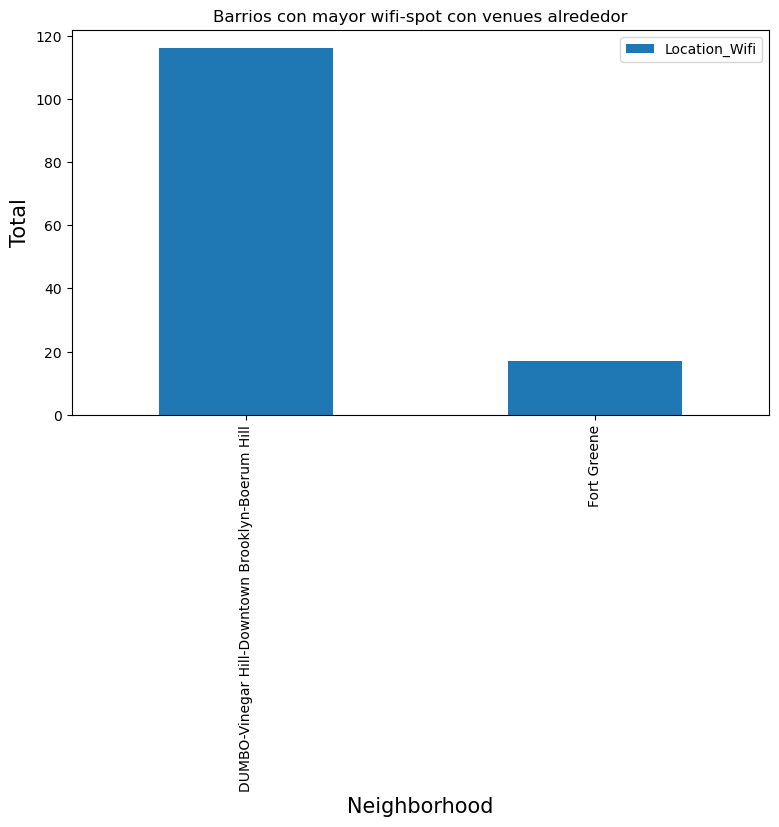

In [108]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Barrios con mayor wifi-spot con venues alrededor')
#On x-axis
plt.xlabel('Neighborhoodh', fontsize = 15)
#On y-axis
plt.ylabel('Total', fontsize=15)
#giving a bar plot
DF_Venues.groupby('Neighborhood')['Location_Wifi'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

<h1>Mapa de los puntos con wifi con mayor concentración de venues(Oficinas, Tienda o Colegios) alrededor</h1>

In [66]:
# crear un mapa con los puntos de wifi que tienen mas de 50 venues alrededor
mapa_totalvenues = folium.Map(location=[40.690844, -73.983463], zoom_start=15)

# añadir los marcadores al mapa de los puntos wifi
for lat, lng, label in zip(DF_Venues['Latitud'], DF_Venues['Longitude'], DF_Venues['Location_Wifi']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=8,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(mapa_totalvenues)  
    
mapa_totalvenues


<h1>Desde este punto identificar cuales wifi-spot tienen menor competencia alrededor entiendace Coffee-Shops</h1>

In [68]:
def get_coffee_count(lat,lng):
    import requests
    url = "https://api.foursquare.com/v3/places/search?ll={}%2C{}&radius=500&categories=13032%2C13037%2C11126&fields=name%2Ccategories%2Clocation%2Cdistance&sort=DISTANCE&limit=50".format(
            lat,lng)

    headers = {
        "accept": "application/json",
        "Authorization": "fsq3Zg8v3F1ZNeaZ0LMdACtrdq7PIOQ5oqh2aaylyDdL1X8="
    }

    response = requests.get(url, headers=headers)
    import json
    data = response.json()
    neighborhoods_data=data['results']
    #Creando las columnas del dataframe
    columnas_nombres = ['Borough', 'Name', 'Distance', 'Category']
    neighborhoods_dataframe = pd.DataFrame(columns=columnas_nombres)
    neighborhoods_dataframe
    #iteraccion para llenar el dataframe
    for data in neighborhoods_data:
        borough = data['location']['locality']
        neighborhood_name = data['name']
        neighborhood_category = data['categories'][0]['name']
        neighborhood_distance = data['distance']
        neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
        'Name': neighborhood_name,
        'Distance': neighborhood_distance,
        'Category':neighborhood_category},ignore_index=True)
        
    return len(neighborhoods_dataframe)

In [76]:
coffee_response=get_coffee_count("40.693219","-73.989998")

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

In [77]:
print(coffee_response)

40


In [78]:
#Creando las columnas del dataframe con la cantidad de tiendas de cafe alrededor
columnas = ['Neighborhood', 'Location_Wifi', 'Total_Coffees', 'Latitud', 'Longitude']
DF_Coffee = pd.DataFrame(columns=columnas)
print(DF_Coffee)

Empty DataFrame
Columns: [Neighborhood, Location_Wifi, Total_Coffees, Latitud, Longitude]
Index: []


In [89]:
#nuevo Dataframe con cantidad de cafes por puntos de wifi del dataframe filtrado ante
for lat,lon,label,neighborhood in zip(DF_Venues['Latitud'],DF_Venues['Longitude'],DF_Venues['Location_Wifi'],DF_Venues['Neighborhood']):
    #Contiene el total de cafes alrededor del wifi-spot
    function_result=get_coffee_count(lat,lon)
    DF_Coffee=DF_Coffee.append({'Neighborhood':neighborhood,'Location_Wifi':label,'Total_Coffees':function_result,'Latitud':lat,'Longitude':lon},ignore_index=True)

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighborhoods_dataframe = neighborhoods_dataframe.append({'Borough': borough,
C:\Users\avaldes\AppData\Local\Temp\ipykernel_18324\3448050885.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

In [111]:
print(DF_Coffee)

           Neighborhood                 Location_Wifi Total_Coffees  \
0   Crown Heights North            1874 FULTON STREET             2   
1   Crown Heights North          1044 EASTERN PARKWAY             3   
2   Crown Heights North     ROOF MOUNTED   RIGHT SIDE             5   
3   Crown Heights North            1741 FULTON STREET             5   
4   Crown Heights North            1805 FULTON STREET             2   
5   Crown Heights North            1803 FULTON STREET             4   
6           Fort Greene          93 ST EDWARDS STREET             5   
7   Crown Heights North  Crown Heights-Utica Av (3,4)             3   
10          Fort Greene              50 Monument Walk             7   
90          Fort Greene              78 Monument Walk             9   

      Latitud  Longitude  
0   40.678960 -73.924424  
1   40.668487 -73.933651  
2   40.673801 -73.935166  
3   40.679381 -73.929834  
4   40.679143 -73.925474  
5   40.679232 -73.927098  
6   40.694490 -73.977733  
7 

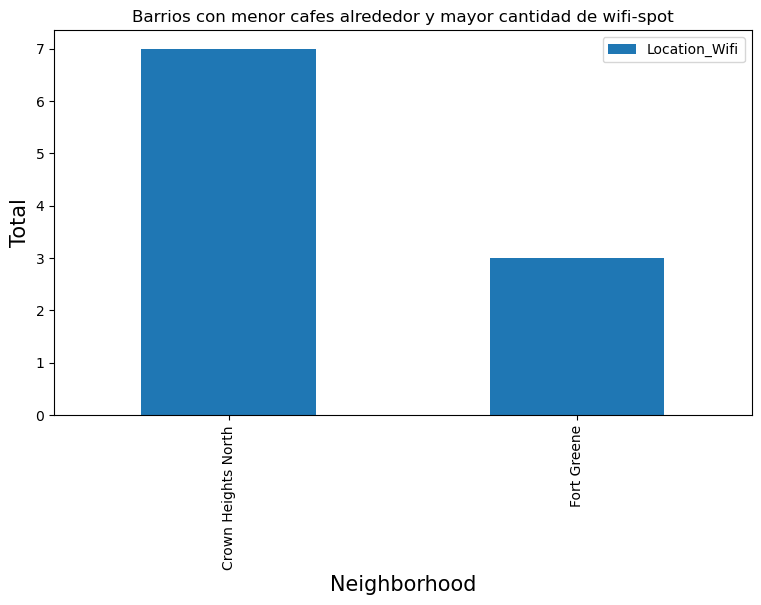

In [113]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Barrios con menor cafes alrededor y mayor cantidad de wifi-spot')
#On x-axis
plt.xlabel('Neighborhoodh', fontsize = 15)
#On y-axis
plt.ylabel('Total', fontsize=15)
#giving a bar plot
DF_Coffee.groupby('Neighborhood')['Location_Wifi'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

In [114]:
#Ordenando el DataFrame con los totales mas bajos primeros

DF_Coffee=DF_Coffee[DF_Coffee['Total_Coffees']<=10]
DF_Coffee.sort_values(['Total_Coffees'],ascending=False).head(100)

Neighborhood                 Location_Wifi Total_Coffees  \
90          Fort Greene              78 Monument Walk             9   
10          Fort Greene              50 Monument Walk             7   
2   Crown Heights North     ROOF MOUNTED   RIGHT SIDE             5   
3   Crown Heights North            1741 FULTON STREET             5   
6           Fort Greene          93 ST EDWARDS STREET             5   
5   Crown Heights North            1803 FULTON STREET             4   
1   Crown Heights North          1044 EASTERN PARKWAY             3   
7   Crown Heights North  Crown Heights-Utica Av (3,4)             3   
0   Crown Heights North            1874 FULTON STREET             2   
4   Crown Heights North            1805 FULTON STREET             2   

      Latitud  Longitude  
90  40.694623 -73.979909  
10  40.695295 -73.980103  
2   40.673801 -73.935166  
3   40.679381 -73.929834  
6   40.694490 -73.977733  
5   40.679232 -73.927098  
1   40.668487 -73.933651  
7   40.668897 -73.932942  
0   40.678960 -73.924424  
4   40.679143 -73.925474

<h1>Resultado</h1>
<h3>Diez puntos de wifi con menos cafes alrededor para competir<h3>

In [104]:
# crear un mapa con los puntos de wifi que tienen mas de 50 venues alrededor
mapa_totalcoffees = folium.Map(location=[40.690844, -73.983463], zoom_start=12)

# añadir los marcadores al mapa de los puntos wifi
for lat, lng, label in zip(DF_Coffee['Latitud'], DF_Coffee['Longitude'], DF_Coffee['Location_Wifi']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=8,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(mapa_totalcoffees)  
    
mapa_totalcoffees

<h2>Descubrimientos</h2>

<ul>
    <li>En <b>DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill</b> tienen la mayor cantidad de puntos de wifi en Brooklyn con universidades, tiendas y oficinas alrededor</li>
    <li>En <b>Crown Heights Northl</b> es donde menor competencia de cafes hay alrededor con mayor cantidad de universidades, tiendas y oficinas alrededor</li>
</ul>

<h2>Recomendación</h2>
En el barrio <b>Crown Heights Northl</b> las localizaciones en <b>1874 FULTON STREET</b> y <b>1805 FULTON STREET</b> son las mejores para establecer un kiosko de café en el sector de Brookly, NY debido a :
<ol>
    <li>Contiene la mayor cantidad(50) de universidades, tiendas u oficinas alrededor con mayor potencial de clientes</li>
    <li>Tiene wifi gratis alrededor siendo otro atractivo para que los clientes se detengan a consumir, sin tener que invertir en un provedor de servicio</li>
    <li>Es donde menos cantidad de competencia de cafes tendra alrededor ya que solo tiene dos</li>

<h1>Conclusión</h1>
<p>En este proyecto, identificamos las localizaciones del sector de Brooklyn , New York con mayor cantidad de venues
alrededor que proveen más clientela para nuestro negocio como también la localizacón con menos competencia alrededor utilizando las data de Foursquare. LUego usando librerias de Folium identificamos esos puntos en una mapa para mejor visialización.</p>
<p>Luego de identificar esas localidades pudimos recomendar que en el barrio de Crown Heights North los puntos de 1874 FULTON STREET y 1805 FULTON STREET serian los de mayor éxito para establecer un negocio o punto de venta de café para los inversionistas.